In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
from pathlib import Path
from math import trunc
from scipy import optimize
import copy
%matplotlib inline


In [53]:
def hulst(a,n,wl):
    p = 4*np.pi*a*(n-1)/wl
    return 2 - ((4/p)*np.sin(p)) + ((2/p)**2 * (1-np.cos(p)))

filt = ['gp','rp','ip']
filt_c = {'gp':'g','rp':'r','ip':'indianred'}
filt_edge = {
    'gp':np.array([4770-1500/2, 4770+1500/2])*1e-10,
    'rp':np.array([6215-1390/2, 6215+1390/2])*1e-10,
    'ip':np.array([7545-1290/2, 7545+1290/2])*1e-10
}

In [75]:
filt_trans = {}
for f in filt:
    d = ascii.read("../LCOGT_filters/SDSS."+f+".txt")
    filt_trans[f] = np.array([d["\lambda"],d["[nm]"]])
    filt_trans[f][0] *= 1e-9 #from nm to m

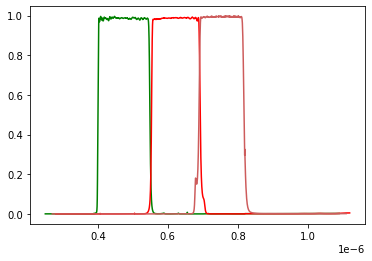

In [76]:
for f in filt:
    plt.plot(filt_trans[f][0],filt_trans[f][1],c=filt_c[f])

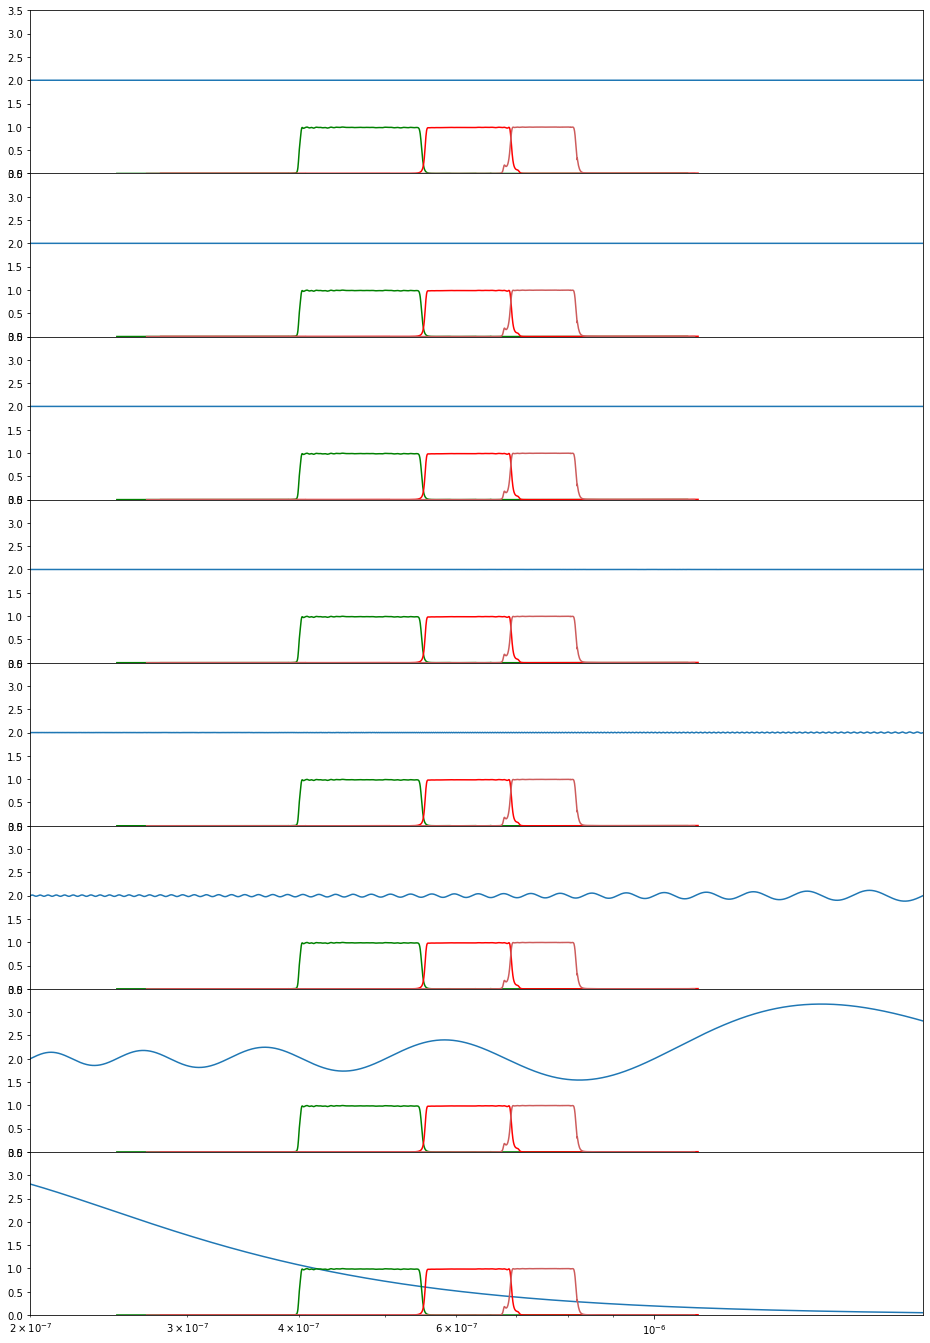

In [83]:
wl_arr = np.arange(200,2000,0.1) * 1e-9 # m
#wl_arr = np.arange(400,860,0.1) * 1e-9 # m

#sizes = np.arange(1,10,1) * 5e-8 #m
sizes = [5e-1, 5e-2, 5e-3,5e-4,5e-5,5e-6,5e-7,5e-8]

fig, axs = plt.subplots(len(sizes), sharex=True, gridspec_kw={'hspace': 0})
fig.set_figheight(3*len(sizes))
fig.set_figwidth(16)
for i in range(len(sizes)):
    axs[i].plot(wl_arr,hulst(sizes[i],0,wl_arr))
    for f in filt:
        axs[i].plot(filt_trans[f][0],filt_trans[f][1],c=filt_c[f])
    axs[i].set_ylim(0,3.5)
#    axs[i].set_yscale('log')
#    axs[i].set_ylim(1e-1,3.5)
axs[i].set_xscale('log')
axs[i].set_xlim(np.min(wl_arr),np.max(wl_arr))
#axs[i].invert_xaxis()

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()